In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# LINEAR REGRESSION

## Price_1

### Price_1 6:3:1

In [2]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [3]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('/content/drive/MyDrive/Study/IS403.N22.HTCL/final project/DATASET/Gold_Price_1.csv')
df = df[['Price (VND)']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [4]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price (VND)'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [5]:
print("Coefficients to independent variables:", model.coef_)
print("Intercept (bias):", model.intercept_)

Coefficients to independent variables: [-3722.43813541]
Intercept (bias): 31885002.791497204


In [6]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price (VND)'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price (VND)'])
y_pred_val =  model.predict(x_val)

In [7]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[21908868.58859842 21905146.150463   21901423.71232759 21897701.27419218
 21893978.83605677 21890256.39792136 21886533.95978595 21882811.52165055
 21879089.08351513 21875366.64537972 21871644.20724431 21867921.7691089
 21864199.33097349 21860476.89283808 21856754.45470268 21853032.01656726
 21849309.57843185 21845587.14029644 21841864.70216103 21838142.26402562
 21834419.82589021 21830697.38775481 21826974.94961939 21823252.51148398
 21819530.07334857 21815807.63521316 21812085.19707775 21808362.75894234
 21804640.32080694 21800917.88267152]


In [8]:
# 7. Đánh giá độ chính xác validate, test
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

valid_rmse = np.sqrt(MSE(y_pred_val, y_val))
test_rmse = np.sqrt(MSE(y_test, y_pred))
valid_mape = MAPE(y_pred_val, y_val)*100
test_mape = MAPE(y_test, y_pred)*100
valid_mae = MAE(y_pred_val, y_val)
test_mae = MAE(y_test, y_pred)

print('Validation RMSE:', valid_rmse)
print('Validation MAPE:', valid_mape)
print('Validation MAE:', valid_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Validation RMSE: 19285155.627861064
Validation MAPE: 85.84830495313437
Validation MAE: 19224861.644203868
Testing RMSE: 12445516.94024576
Testing MAPE: 28.107456102390678
Testing MAE: 10602195.868773364


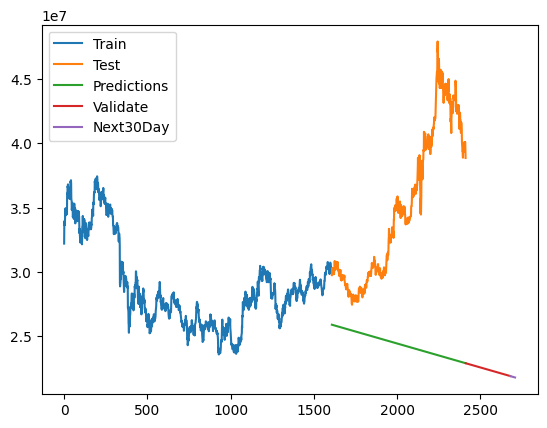

In [9]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['Price (VND)'])
plt.plot(test_data.index, test_data['Price (VND)'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [10]:
test_data.index

RangeIndex(start=1608, stop=2412, step=1)

### Price_1 7:2:1

In [11]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [12]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('/content/drive/MyDrive/Study/IS403.N22.HTCL/final project/DATASET/Gold_Price_1.csv')
df = df[['Price (VND)']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [13]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price (VND)'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [14]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price (VND)'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price (VND)'])
y_pred_val =  model.predict(x_val)

In [15]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[25072438.85385196 25070219.00770495 25067999.16155794 25065779.31541093
 25063559.46926392 25061339.62311691 25059119.77696989 25056899.93082289
 25054680.08467587 25052460.23852887 25050240.39238185 25048020.54623485
 25045800.70008783 25043580.85394083 25041361.00779381 25039141.16164681
 25036921.31549979 25034701.46935279 25032481.62320577 25030261.77705877
 25028041.93091175 25025822.08476475 25023602.23861773 25021382.39247072
 25019162.54632371 25016942.7001767  25014722.85402969 25012503.00788268
 25010283.16173567 25008063.31558866]


In [16]:
# 7. Đánh giá độ chính xác validate, test
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

valid_rmse = np.sqrt(MSE(y_pred_val, y_val))
test_rmse = np.sqrt(MSE(y_test, y_pred))
valid_mape = MAPE(y_pred_val, y_val)*100
test_mape = MAPE(y_test, y_pred)*100
valid_mae = MAE(y_pred_val, y_val)
test_mae = MAE(y_test, y_pred)

print('Validation RMSE:', valid_rmse)
print('Validation MAPE:', valid_mape)
print('Validation MAE:', valid_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Validation RMSE: 16318882.812019246
Validation MAPE: 64.07560652569583
Validation MAE: 16251930.677416915
Testing RMSE: 12712022.57464164
Testing MAPE: 29.35970204537674
Testing MAE: 11612709.996346498


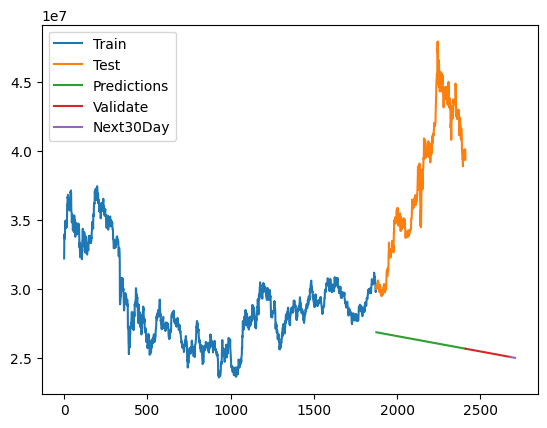

In [17]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['Price (VND)'])
plt.plot(test_data.index, test_data['Price (VND)'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [18]:
test_data.index

RangeIndex(start=1875, stop=2411, step=1)

### Price_1 8:1:1

In [19]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [20]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('/content/drive/MyDrive/Study/IS403.N22.HTCL/final project/DATASET/Gold_Price_1.csv')
df = df[['Price (VND)']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = int(0.1 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [21]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price (VND)'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [22]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price (VND)'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price (VND)'])
y_pred_val =  model.predict(x_val)

In [23]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[29556864.9627094  29556880.66447558 29556896.36624176 29556912.06800794
 29556927.76977412 29556943.4715403  29556959.17330648 29556974.87507266
 29556990.57683884 29557006.27860502 29557021.9803712  29557037.68213738
 29557053.38390356 29557069.08566974 29557084.78743592 29557100.48920209
 29557116.19096828 29557131.89273445 29557147.59450063 29557163.29626681
 29557178.99803299 29557194.69979917 29557210.40156535 29557226.10333153
 29557241.80509771 29557257.50686389 29557273.20863007 29557288.91039625
 29557304.61216243 29557320.31392861]


In [24]:
# 7. Đánh giá độ chính xác validate, test
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

valid_rmse = np.sqrt(MSE(y_pred_val, y_val))
test_rmse = np.sqrt(MSE(y_test, y_pred))
valid_mape = MAPE(y_pred_val, y_val)*100
test_mape = MAPE(y_test, y_pred)*100
valid_mae = MAE(y_pred_val, y_val)
test_mae = MAE(y_test, y_pred)

print('Validation RMSE:', valid_rmse)
print('Validation MAPE:', valid_mape)
print('Validation MAE:', valid_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Validation RMSE: 12160212.208463293
Validation MAPE: 40.87202082232816
Validation MAE: 12079645.086856663
Testing RMSE: 12780731.705727343
Testing MAPE: 29.660422881750897
Testing MAE: 12581605.803364405


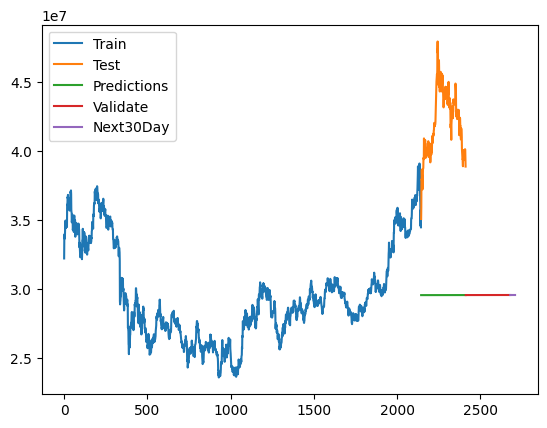

In [25]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['Price (VND)'])
plt.plot(test_data.index, test_data['Price (VND)'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [26]:
test_data.index

RangeIndex(start=2144, stop=2412, step=1)

## Price_2

### Price_2 6:3:1

In [77]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [78]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('/content/drive/MyDrive/Study/IS403.N22.HTCL/final project/DATASET/Gold_Price_2.csv')
df = df[['GLD']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [79]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['GLD'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [80]:
print("Coefficients to independent variables:", model.coef_)
print("Intercept (bias):", model.intercept_)

Coefficients to independent variables: [0.05426891]
Intercept (bias): 88.53294886393014


In [81]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['GLD'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['GLD'])
y_pred_val =  model.predict(x_val)

In [82]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[212.8087641  212.86303301 212.91730193 212.97157084 213.02583976
 213.08010867 213.13437759 213.1886465  213.24291542 213.29718433
 213.35145325 213.40572216 213.45999108 213.51425999 213.5685289
 213.62279782 213.67706673 213.73133565 213.78560456 213.83987348
 213.89414239 213.94841131 214.00268022 214.05694914 214.11121805
 214.16548697 214.21975588 214.2740248  214.32829371 214.38256263]


In [83]:
# 7. Đánh giá độ chính xác validate, test
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

valid_rmse = np.sqrt(MSE(y_pred_val, y_val))
test_rmse = np.sqrt(MSE(y_test, y_pred))
valid_mape = MAPE(y_pred_val, y_val)*100
test_mape = MAPE(y_test, y_pred)*100
valid_mae = MAE(y_pred_val, y_val)
test_mae = MAE(y_test, y_pred)

print('Validation RMSE:', valid_rmse)
print('Validation MAPE:', valid_mape)
print('Validation MAE:', valid_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Validation RMSE: 83.80423437943257
Validation MAPE: 40.55431897898914
Validation MAE: 83.76707972815184
Testing RMSE: 66.4711308524703
Testing MAPE: 56.46728605321116
Testing MAE: 65.11379658864213


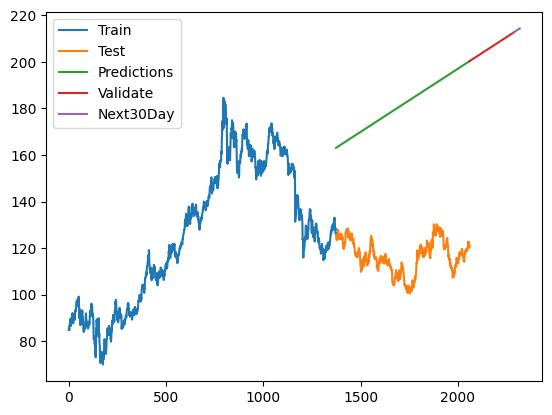

In [84]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['GLD'])
plt.plot(test_data.index, test_data['GLD'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [85]:
test_data.index

RangeIndex(start=1374, stop=2061, step=1)

### Price_2 7:2:1

In [36]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [37]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('/content/drive/MyDrive/Study/IS403.N22.HTCL/final project/DATASET/Gold_Price_2.csv')
df = df[['GLD']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [38]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['GLD'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [39]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['GLD'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['GLD'])
y_pred_val =  model.predict(x_val)

In [40]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[171.40997345 171.44119691 171.47242036 171.50364382 171.53486728
 171.56609073 171.59731419 171.62853764 171.6597611  171.69098456
 171.72220801 171.75343147 171.78465493 171.81587838 171.84710184
 171.87832529 171.90954875 171.94077221 171.97199566 172.00321912
 172.03444258 172.06566603 172.09688949 172.12811295 172.1593364
 172.19055986 172.22178331 172.25300677 172.28423023 172.31545368]


In [41]:
# 7. Đánh giá độ chính xác validate, test
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

valid_rmse = np.sqrt(MSE(y_pred_val, y_val))
test_rmse = np.sqrt(MSE(y_test, y_pred))
valid_mape = MAPE(y_pred_val, y_val)*100
test_mape = MAPE(y_test, y_pred)*100
valid_mae = MAE(y_pred_val, y_val)
test_mae = MAE(y_test, y_pred)

print('Validation RMSE:', valid_rmse)
print('Validation MAPE:', valid_mape)
print('Validation MAE:', valid_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Validation RMSE: 45.07399435807577
Validation MAPE: 26.83230029212844
Validation MAE: 45.01851682956079
Testing RMSE: 42.539539544799034
Testing MAPE: 36.990669933476724
Testing MAE: 42.043887611565474


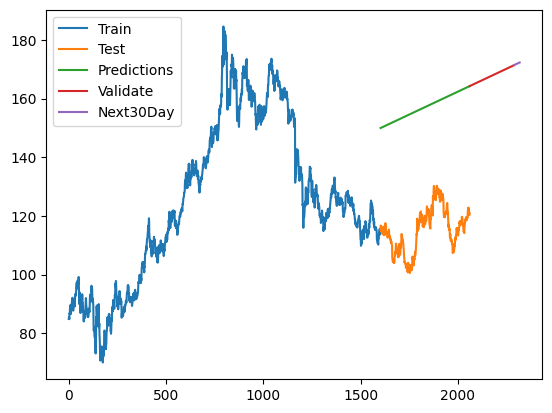

In [42]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['GLD'])
plt.plot(test_data.index, test_data['GLD'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [43]:
test_data.index

RangeIndex(start=1603, stop=2061, step=1)

### Price_2 8:1:1

In [44]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [45]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('/content/drive/MyDrive/Study/IS403.N22.HTCL/final project/DATASET/Gold_Price_2.csv')
df = df[['GLD']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = int(0.1 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [46]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['GLD'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [47]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['GLD'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['GLD'])
y_pred_val =  model.predict(x_val)

In [48]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[144.71295554 144.72867769 144.74439985 144.760122   144.77584415
 144.7915663  144.80728845 144.8230106  144.83873275 144.8544549
 144.87017705 144.8858992  144.90162135 144.9173435  144.93306565
 144.9487878  144.96450995 144.9802321  144.99595425 145.0116764
 145.02739855 145.0431207  145.05884285 145.074565   145.09028715
 145.1060093  145.12173145 145.1374536  145.15317575 145.1688979 ]


In [49]:
# 7. Đánh giá độ chính xác validate, test
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

valid_rmse = np.sqrt(MSE(y_pred_val, y_val))
test_rmse = np.sqrt(MSE(y_test, y_pred))
valid_mape = MAPE(y_pred_val, y_val)*100
test_mape = MAPE(y_test, y_pred)*100
valid_mae = MAE(y_pred_val, y_val)
test_mae = MAE(y_test, y_pred)

print('Validation RMSE:', valid_rmse)
print('Validation MAPE:', valid_mape)
print('Validation MAE:', valid_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Validation RMSE: 20.272151906777356
Validation MAPE: 14.075993607971174
Validation MAE: 20.104149138183978
Testing RMSE: 20.540739284438434
Testing MAPE: 16.648715386775788
Testing MAE: 19.599426509744813


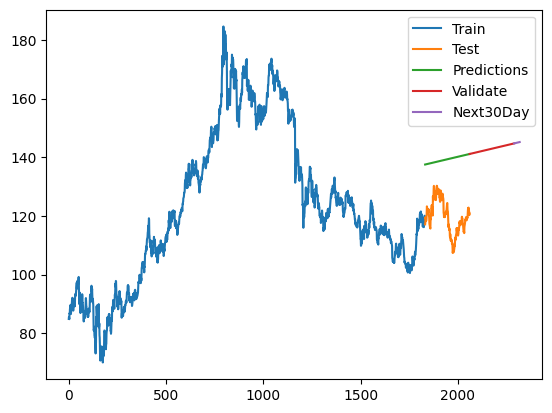

In [50]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['GLD'])
plt.plot(test_data.index, test_data['GLD'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [51]:
test_data.index

RangeIndex(start=1832, stop=2061, step=1)

## Price_3

### Price_3 6:3:1

In [86]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [87]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('/content/drive/MyDrive/Study/IS403.N22.HTCL/final project/DATASET/Gold_Price_3.csv')
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [88]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [89]:
print("Coefficients to independent variables:", model.coef_)
print("Intercept (bias):", model.intercept_)

Coefficients to independent variables: [0.35097937]
Intercept (bias): 1161.8531773287968


In [90]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [91]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[1779.92784062 1780.27881998 1780.62979935 1780.98077871 1781.33175808
 1781.68273745 1782.03371681 1782.38469618 1782.73567554 1783.08665491
 1783.43763428 1783.78861364 1784.13959301 1784.49057237 1784.84155174
 1785.19253111 1785.54351047 1785.89448984 1786.2454692  1786.59644857
 1786.94742793 1787.2984073  1787.64938667 1788.00036603 1788.3513454
 1788.70232476 1789.05330413 1789.4042835  1789.75526286 1790.10624223]


In [92]:
# 7. Đánh giá độ chính xác validate, test
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

valid_rmse = np.sqrt(MSE(y_pred_val, y_val))
test_rmse = np.sqrt(MSE(y_test, y_pred))
valid_mape = MAPE(y_pred_val, y_val)*100
test_mape = MAPE(y_test, y_pred)*100
valid_mae = MAE(y_pred_val, y_val)
test_mae = MAE(y_test, y_pred)

print('Validation RMSE:', valid_rmse)
print('Validation MAPE:', valid_mape)
print('Validation MAE:', valid_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Validation RMSE: 120.22670657809911
Validation MAPE: 5.511235534380653
Validation MAE: 96.92860309274513
Testing RMSE: 233.11351014572682
Testing MAPE: 11.323919459861976
Testing MAE: 210.82773990218402


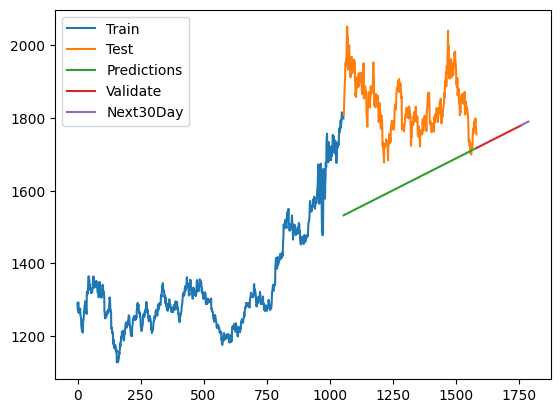

In [93]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [60]:
test_data.index

RangeIndex(start=1056, stop=1584, step=1)

### Price_3 7:2:1

In [61]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [62]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('/content/drive/MyDrive/Study/IS403.N22.HTCL/final project/DATASET/Gold_Price_3.csv')
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [63]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [64]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [65]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[2024.70262868 2025.22954416 2025.75645964 2026.28337513 2026.81029061
 2027.33720609 2027.86412158 2028.39103706 2028.91795254 2029.44486803
 2029.97178351 2030.49869899 2031.02561448 2031.55252996 2032.07944544
 2032.60636093 2033.13327641 2033.6601919  2034.18710738 2034.71402286
 2035.24093835 2035.76785383 2036.29476931 2036.8216848  2037.34860028
 2037.87551576 2038.40243125 2038.92934673 2039.45626221 2039.9831777 ]


In [66]:
# 7. Đánh giá độ chính xác validate, test
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

valid_rmse = np.sqrt(MSE(y_pred_val, y_val))
test_rmse = np.sqrt(MSE(y_test, y_pred))
valid_mape = MAPE(y_pred_val, y_val)*100
test_mape = MAPE(y_test, y_pred)*100
valid_mae = MAE(y_pred_val, y_val)
test_mae = MAE(y_test, y_pred)

print('Validation RMSE:', valid_rmse)
print('Validation MAPE:', valid_mape)
print('Validation MAE:', valid_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Validation RMSE: 189.0570037453185
Validation MAPE: 8.381451971642957
Validation MAE: 164.6864565538422
Testing RMSE: 76.58679785132243
Testing MAPE: 3.229802052841003
Testing MAE: 58.60231296251903


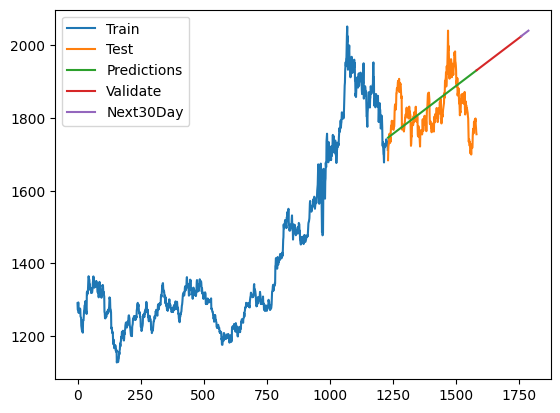

In [67]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [68]:
test_data.index

RangeIndex(start=1232, stop=1584, step=1)

### Price_3 8:1:1

In [69]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [70]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('/content/drive/MyDrive/Study/IS403.N22.HTCL/final project/DATASET/Gold_Price_3.csv')
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = int(0.1 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [71]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [72]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [73]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[2027.72507793 2028.25404305 2028.78300818 2029.3119733  2029.84093842
 2030.36990355 2030.89886867 2031.42783379 2031.95679891 2032.48576404
 2033.01472916 2033.54369428 2034.07265941 2034.60162453 2035.13058965
 2035.65955477 2036.1885199  2036.71748502 2037.24645014 2037.77541527
 2038.30438039 2038.83334551 2039.36231063 2039.89127576 2040.42024088
 2040.949206   2041.47817113 2042.00713625 2042.53610137 2043.06506649]


In [74]:
# 7. Đánh giá độ chính xác validate, test
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

valid_rmse = np.sqrt(MSE(y_pred_val, y_val))
test_rmse = np.sqrt(MSE(y_test, y_pred))
valid_mape = MAPE(y_pred_val, y_val)*100
test_mape = MAPE(y_test, y_pred)*100
valid_mae = MAE(y_pred_val, y_val)
test_mae = MAE(y_test, y_pred)

print('Validation RMSE:', valid_rmse)
print('Validation MAPE:', valid_mape)
print('Validation MAE:', valid_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Validation RMSE: 191.48694967055636
Validation MAPE: 8.507899611120754
Validation MAE: 167.42525947145316
Testing RMSE: 95.18278773131964
Testing MAPE: 4.277175789964628
Testing MAE: 77.48203042128804


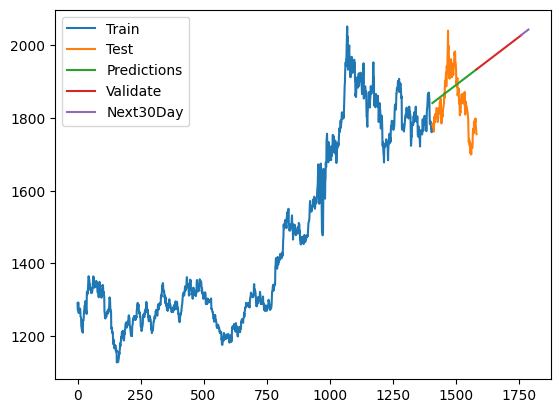

In [75]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [76]:
test_data.index

RangeIndex(start=1408, stop=1584, step=1)